# Praca domowa 6

Zaczniemy od załadowania bibliotek na potrzeby całej pracy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

Przygotujmy również zbiór danych i od razu przyjrzyjmy się jego pierwszym pięciu wierszom.

In [2]:
data = pd.read_csv(".../clustering_R3.csv")
data.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


Wydaje się, że przydatne będzie przeskalowanie danych, ponieważ kolejne kolumny mogą przyjmować odmienne zakresy. Sprawdźmy czy rzeczywiście będzie to problemem.

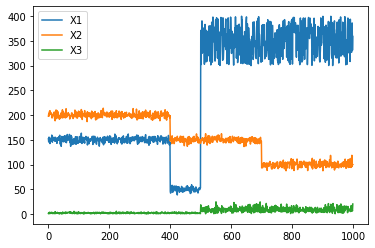

In [3]:
data.plot()

Zgodnie z oczekiwaniami skalowanie danych jest zalecane, więc jest to odpowiedni moment na wykonanie go.

In [4]:
Standarized = pd.DataFrame(data[['X1', 'X2', 'X3']])
Standarized = StandardScaler().fit_transform(Standarized)

data[['X1', 'X2', 'X3']] = Standarized

data.head()

,X1,X2,X3
0,-0.762807,1.024554,-0.909772
1,-0.819582,1.125110,-0.566853
2,-0.733687,1.029615,-1.004782
3,-0.777429,1.236698,-0.995176
4,-0.781982,1.203537,-0.396348


Spróbujmy zwizualizować nasz zbiór w takiej liczbie wymiarów jaka jest dla niego naturalna (3).

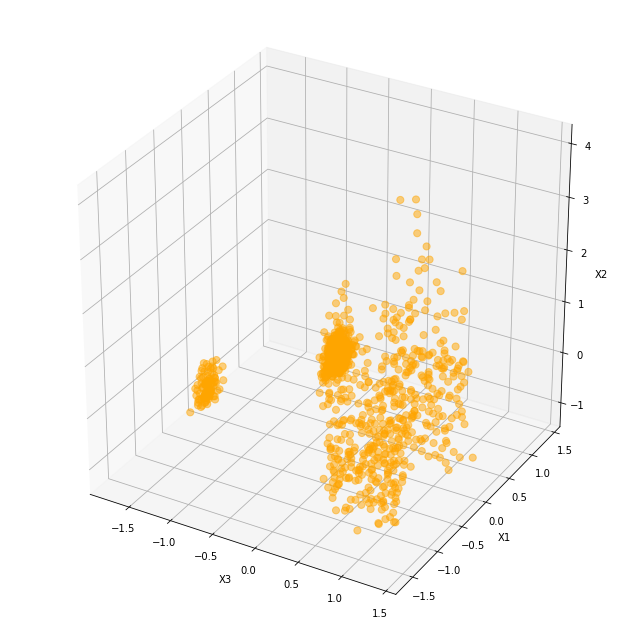

In [5]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.X1, data.X2, data.X3, s=50, alpha = 0.5, c = "orange")

ax.set_xlabel('X3')
ax.set_ylabel('X1')
ax.set_zlabel('X2')

plt.tight_layout()
plt.show()

Teoretycznie widać dwa mniejsze zagęszczenia oraz jeden większy zbiór punktów, ale perspektywa nie jest idealna, więc ciężko stwierdzić czy w tym zbiorze nie kryje się coś jeszcze. Dlatego dalsze wizualizacje będziemy przeprowadzać w dwóch wymiarach:

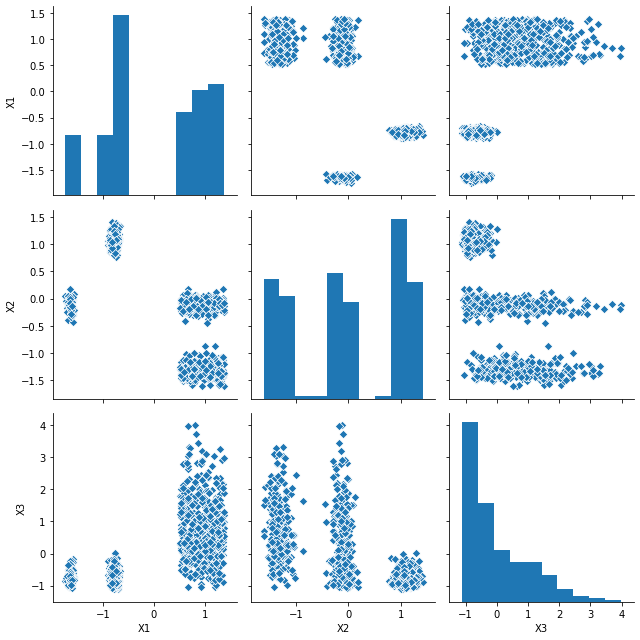

In [6]:
sns.pairplot(data, height=3, markers="D")
plt.tight_layout()

## AgglomerativeClustering

Najpierw, wykorzystując indeks Daviesa-Bouldina oraz indeks Calinskiego-Harabasza znajdziemy optymalną liczbę klastrów. Warto zaznaczyć, że pierwszy indeks wyznacza lepszą liczbę klastrów przez przyznawanie im niższych wartości, natomiast drugi działa w przeciwny sposób.

In [7]:
def Davies_Bouldin_for_AgglomerativeClustering(df, k_max):
    """
    function that prepares plot showing Davies–Bouldin score for each number of clusters from 2 up to k_max
    """
    scores = []    
    for k in range(2, k_max):
        model_instance = AgglomerativeClustering(n_clusters=k)
        labels = model_instance.fit_predict(df)
        wcss = davies_bouldin_score(df, labels)
        scores.append(wcss)
    plt.plot(range(2, k_max), scores, 'go--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies–Bouldin score')
    plt.title('Davies–Bouldin score for AgglomerativeClustering algorithm showing the optimal number of clusters')
    return plt

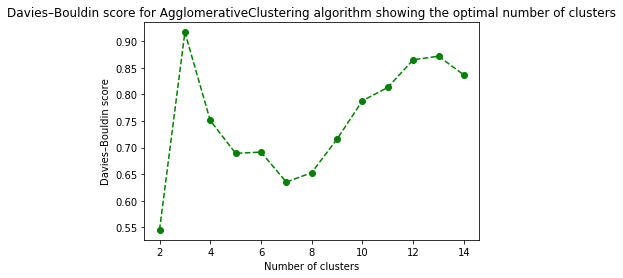

In [8]:
Davies_Bouldin_for_AgglomerativeClustering(data, 15).show()

In [9]:
def Calinski_Harabasz_for_AgglomerativeClustering(df, k_max):
    """
    function that prepares plot showing Calinski-Harabasz score for each number of clusters from 2 up to k_max
    """
    scores = []    
    for k in range(2, k_max):
        model_instance = AgglomerativeClustering(n_clusters=k)
        labels = model_instance.fit_predict(df)
        wcss = calinski_harabasz_score(df, labels)
        scores.append(wcss)
    plt.plot(range(2, k_max), scores, 'go--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Calinski-Harabasz score')
    plt.title("Calinski-Harabasz score for AgglomerativeClustering algorithm showing the optimal number of clusters")
    return plt

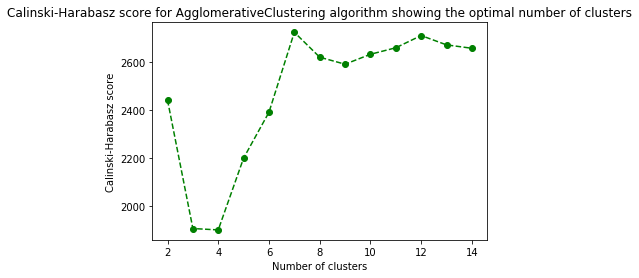

In [10]:
Calinski_Harabasz_for_AgglomerativeClustering(data, 15).show()

Możemy zaobserwować, że indeks Daviesa-Bouldina sugeruje wybranie 2 klastrów, natomiast indeks Calinskiego-Harabasza zaleca utworzenia 7 klastrów. Oba podziały zostaną teraz zwizualizowane.

In [11]:
model_instance = AgglomerativeClustering(n_clusters=2)
data['agg'] = model_instance.fit_predict(data)

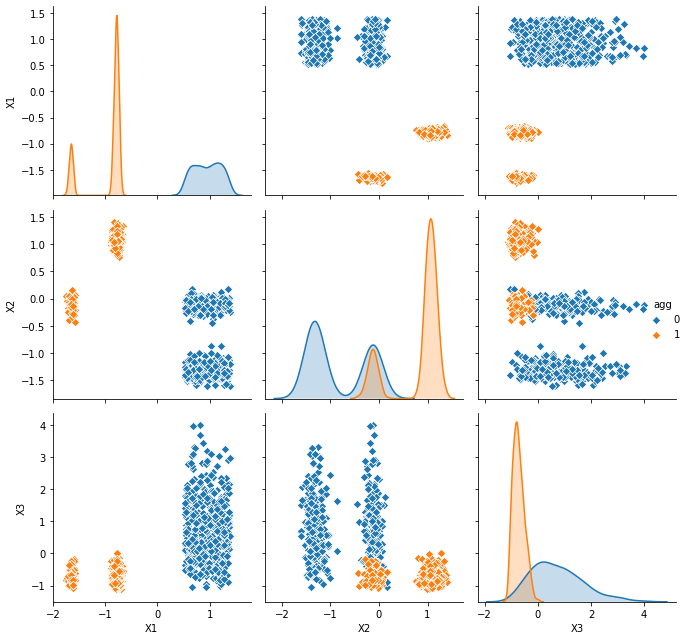

In [12]:
sns.pairplot(data, height=3, hue = 'agg', markers="D")
plt.tight_layout()

In [13]:
data = data.drop('agg', axis = 1)

In [14]:
model_instance = AgglomerativeClustering(n_clusters=7)
data['agg'] = model_instance.fit_predict(data)

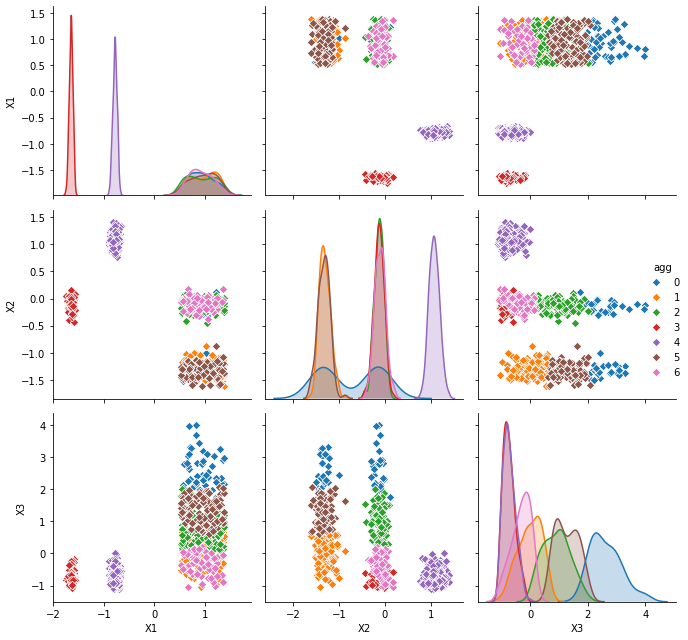

In [15]:
sns.pairplot(data, height=3, hue = 'agg', markers="D")
plt.tight_layout()

Podsumowując ten fragment, można stwierdzić, że podział na dwie grupy wydaje się być bardziej naturalny.

In [16]:
data = data.drop('agg', axis = 1)

# DBSCN

Teraz znajdziemy optymalną wartość parametru eps wykorzystując te same metryki co wcześniej.

In [17]:
def Davies_Bouldin_for_DBSCN(df, k_max):
    """
    function that prepares plot showing Davies–Bouldin score for each value of eps from 0.1 up to k_max/10
    """
    scores = []
    for k in range(1, k_max):
        labels = DBSCAN(eps = k/10).fit_predict(df)
        scores.append(davies_bouldin_score(df, labels))
    plt.figure(figsize = (10,5))
    plt.plot(np.arange(1/10, k_max/10, 1/10), scores, 'go--')
    plt.xlabel('Value of eps')
    plt.ylabel('Davies–Bouldin score')
    plt.title('Davies–Bouldin score for DBSCN algorithm showing the optimal eps')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\welki\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

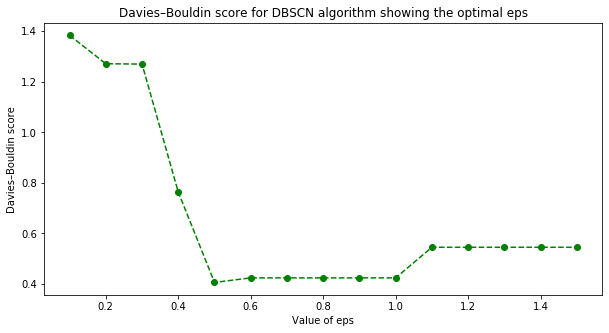

In [18]:
Davies_Bouldin_for_DBSCN(data, 16)

In [19]:
def Calinski_Harabasz_for_DBSCN(df, k_max):
    """
    function that prepares plot showing Calinski-Harabasz score for each value of eps from 0.1 up to k_max/10
    """
    scores = []
    for k in range(1, k_max):
        labels = DBSCAN(eps = k/10).fit_predict(df)
        scores.append(calinski_harabasz_score(df, labels))
    plt.figure(figsize = (10,5))
    plt.plot(np.arange(1/10, k_max/10, 1/10), scores, 'go--')
    plt.xlabel('Value of eps')
    plt.ylabel('Calinski-Harabasz score')
    plt.title('Calinski-Harabasz score for DBSCN algorithm showing the optimal eps')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\welki\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

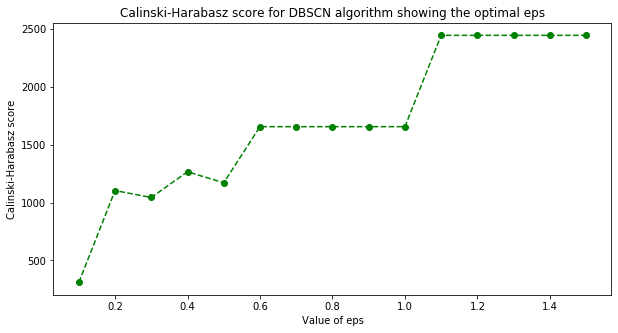

In [20]:
Calinski_Harabasz_for_DBSCN(data, 16)

Sugerowane wartości przez rozważane indeksy to kolejno 0.5 oraz 1.1, dlatego znowu zwizualizujemy oba scenariusze.

In [21]:
data['dbscn'] = DBSCAN(eps = 0.5).fit_predict(data)

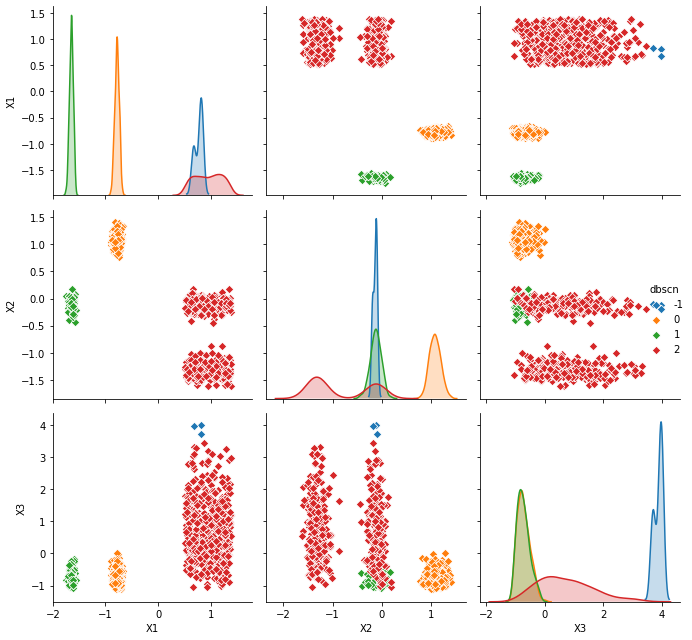

In [22]:
sns.pairplot(data, height=3, hue = 'dbscn', markers="D")
plt.tight_layout()

In [23]:
data = data.drop('dbscn', axis = 1)

In [24]:
data['dbscn'] = DBSCAN(eps = 1.1).fit_predict(data)

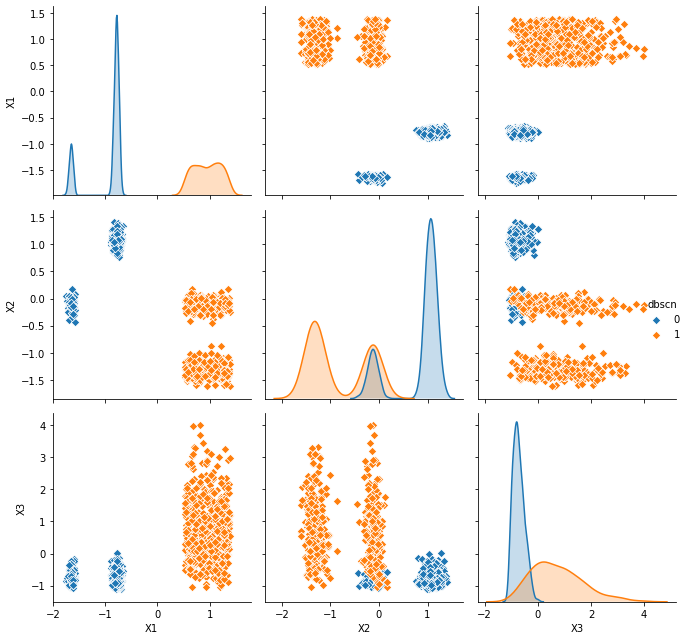

In [25]:
sns.pairplot(data, height=3, hue = 'dbscn', markers="D")
plt.tight_layout()

In [26]:
data = data.drop('dbscn', axis = 1)

W tym przypadku warto zauważyć, że DBSCN z esp równym 1.1 podział wydaje się być podobny do algorytmu aglomerującego dla 2 klastrów.

# Porównanie metod

Wreszcie porównamy przygotowane algorytmy na obu rozważanych metrykach.

In [27]:
model_agg_2 = AgglomerativeClustering(n_clusters=2)
model_agg_7 = AgglomerativeClustering(n_clusters=7)
labels_agg_2 = model_agg_2.fit_predict(data)
labels_agg_7 = model_agg_7.fit_predict(data)
ch_results_agg_2 = calinski_harabasz_score(data, labels_agg_2)
db_results_agg_2 = davies_bouldin_score(data, labels_agg_2)
ch_results_agg_7 = calinski_harabasz_score(data, labels_agg_7)
db_results_agg_7 = davies_bouldin_score(data, labels_agg_7)
labels_dbscan_05 = DBSCAN(eps = 0.5).fit_predict(data)
labels_dbscan_11 = DBSCAN(eps = 1.1).fit_predict(data)
ch_results_dbscan_05 = calinski_harabasz_score(data, labels_dbscan_05)
db_results_dbscan_05 = davies_bouldin_score(data, labels_dbscan_05)
ch_results_dbscan_11 = calinski_harabasz_score(data, labels_dbscan_11)
db_results_dbscan_11 = davies_bouldin_score(data, labels_dbscan_11)
results = pd.DataFrame({
    'Davies–Bouldin score': [db_results_agg_2, db_results_agg_7, db_results_dbscan_05, db_results_dbscan_11],
    'Calinski-Harabasz score': [ch_results_agg_2, ch_results_agg_7, ch_results_dbscan_05, ch_results_dbscan_11]})
results.rename(index={0: 'AgglomerativeClustering with k = 2',
                 1: 'AgglomerativeClustering with k = 7',
                 2: 'DBSCN with eps = 0.5',
                 3: 'DBSCN with eps = 1.1'},
          inplace=True)

In [28]:
results

,Davies–Bouldin score,Calinski-Harabasz score
AgglomerativeClustering with k = 2,0.545305,2442.315877
AgglomerativeClustering with k = 7,0.635119,2724.619128
DBSCN with eps = 0.5,0.406175,1170.442088
DBSCN with eps = 1.1,0.545305,2442.315877


Z pośród rozważanych najlepsze wydają się być algorytm aglomerujący dla 2 klastrów oraz DBSCN z eps równym 1.1, ponieważ zwracają one ten sam podział. Algorytm DBSCN z eps równym 0.5 osiąga znacząco lepsze wyniki w indeksie Daviesa-Bouldina, ale patrząc na drugi z indeksów natychmiast dojdziemy do wniosku, że nie może być on rozważany jako najlepszy scenariusz.

# Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

Imię i Nazwisko:   Konrad Welkier